<a href="https://colab.research.google.com/github/Minh-A/Data_Analysis/blob/main/Analysis_1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import os
import glob
import random

import warnings
warnings.filterwarnings("ignore")

In [5]:
train = glob.glob('/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/*.csv')
len(train)

6

In [6]:
train

['/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis2.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis3.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis4.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis5.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis6.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis.csv']

In [7]:
temp = pd.read_csv(train[0], encoding='cp949', index_col= 'Unnamed: 0')
temp

,코드,코드명,현재가,거래량,거래대금,날짜,시가,고가,저가
0,002680,한탑,2650,1472052,3988,20201230,2515,2925,2450
1,002680,한탑,2500,328018,844,20201229,2640,2680,2485
2,002680,한탑,2675,506930,1310,20201228,2595,2700,2490
3,002680,한탑,2625,267663,697,20201224,2615,2665,2530
4,002680,한탑,2630,387148,1015,20201223,2750,2775,2535
...,...,...,...,...,...,...,...,...,...
39195,000720,현대건설,32950,2108776,69084,20201110,32400,33250,32050
39196,000720,현대건설,31750,739098,23298,20201109,31250,31800,31100
39197,000720,현대건설,31050,554258,17263,20201106,31300,31550,30950
39198,000720,현대건설,31300,828936,25870,20201105,31350,31550,30850


In [8]:
a = temp.iloc[0:40,:]  # :은 작다를 의미, 작거나 같다를 의미하는 것은 아님
a.tail()

,코드,코드명,현재가,거래량,거래대금,날짜,시가,고가,저가
35,002680,한탑,2300,282084,647,20201110,2295,2340,2200
36,002680,한탑,2320,140505,323,20201109,2230,2325,2230
37,002680,한탑,2250,108889,242,20201106,2250,2250,2190
38,002680,한탑,2260,279565,627,20201105,2285,2350,2140
39,002680,한탑,2285,1175997,2666,20201104,2100,2390,2085


In [ ]:
int(len(temp)/40)

980

In [ ]:
160 /40

4.0

In [ ]:
for i in range(4):
  if i == 0:
    f = i
  else:
    f = i + (39*i)
  j = f + 40
  print(f,j)

0 40
40 80
80 120
120 160


In [ ]:
0 40
41 81
82 122

In [9]:
# 변수 지정
for i in range(int(len(temp)/40)):
  if i == 0:
    f = i
  else:
    f = i + (39*i)
  n = f + 40
  globals()['t_{}'.format(i+1)] = temp.iloc[f:n,:].reset_index(drop = True)
print(f,n)

39160 39200


In [ ]:
39200 /40

980.0

In [ ]:
t_980.tail()

,코드,코드명,현재가,거래량,거래대금,날짜,시가,고가,저가
35,000720,현대건설,32950,2108776,69084,20201110,32400,33250,32050
36,000720,현대건설,31750,739098,23298,20201109,31250,31800,31100
37,000720,현대건설,31050,554258,17263,20201106,31300,31550,30950
38,000720,현대건설,31300,828936,25870,20201105,31350,31550,30850
39,000720,현대건설,31550,853254,26794,20201104,31400,31850,31000


In [11]:
a = t_1.loc[:,['현재가','거래량','시가']]
a = a.to_numpy()

In [12]:
a[:,0]

array([2650, 2500, 2675, 2625, 2630, 2725, 2705, 2845, 2860, 2825, 2940,
       3020, 3280, 3450, 3210, 3240, 3205, 2980, 3335, 3485, 3535, 3545,
       3350, 3100, 3130, 2915, 3000, 2600, 2450, 2295, 2265, 2155, 2055,
       2090, 2100, 2300, 2320, 2250, 2260, 2285])

> 첫 번째는 40일간의 데이터를 가지고, 종목을 뽑아보기

> 거래량과 시가, 고가, 저가

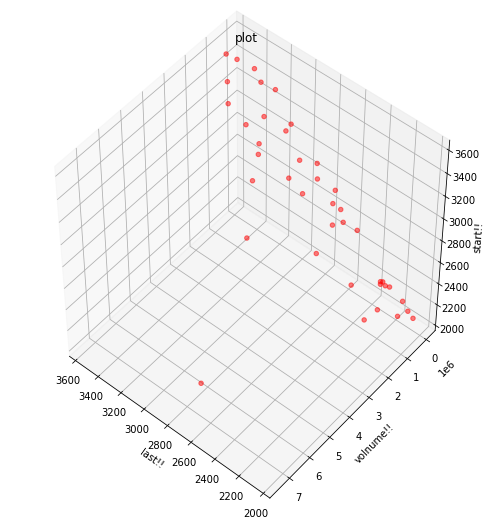

In [13]:
#군집 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=130)
ax.scatter(a[:,0], a[:,1], a[:,2], c= 'r', alpha=0.5, cmap='rainbow')
ax.set_title('plot')
ax.set_xlabel('last!!')
ax.set_ylabel('volnume!!')
ax.set_zlabel('start!!')
plt.show()

In [14]:
# K-Means 모델
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 3
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(a)
predict = pd.DataFrame(model.predict(a))
predict.columns=['predict']

In [16]:
# vstack은 행으로 붙이기, hstack는 열로 붙이기
final_df = pd.DataFrame(np.hstack((predict, a)))

In [17]:
final_df.head()

,0,1,2,3
0,2,2650,1472052,2515
1,0,2500,328018,2640
2,0,2675,506930,2595
3,0,2625,267663,2615
4,0,2630,387148,2750


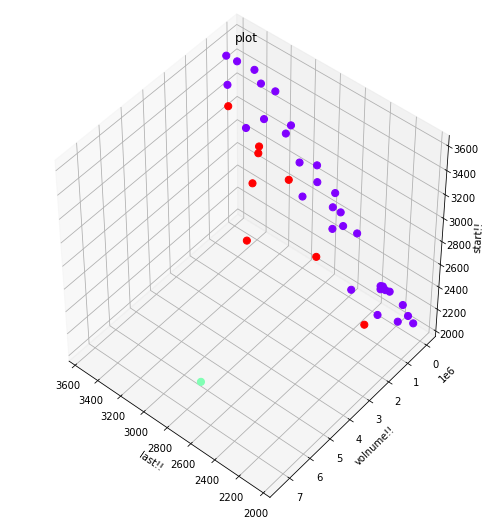

In [18]:
#군집 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=130)
ax.scatter(final_df[1], final_df[2], final_df[3], c= final_df[0], alpha=1, s = 50,cmap='rainbow')
ax.set_title('plot')
ax.set_xlabel('last!!')
ax.set_ylabel('volnume!!')
ax.set_zlabel('start!!')
plt.show()

In [173]:
# K-Means 함수

def kmeans(data): 
  # 라이브러리
  from sklearn.cluster import KMeans
  import matplotlib.pyplot  as plt
  from mpl_toolkits.mplot3d import Axes3D

  data =data.loc[:,['현재가','거래량','시가']]
  data = data.to_numpy()

  k = 8
  model = KMeans(n_clusters=k,algorithm='auto')
  model.fit(data)
  predict = pd.DataFrame(model.predict(data))
  predict.columns=['predict']

  global name
  name = pd.DataFrame(np.hstack((predict, data)))

  fig = plt.figure(figsize=(8, 8))
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=130)
  ax.scatter(name[1], name[2], name[3], c= name[0], alpha=1, s=50, cmap='rainbow') 
  ax.set_title('plot')
  ax.set_xlabel('last!!')
  ax.set_ylabel('volnume!!')
  ax.set_zlabel('start!!')
  plt.show()

In [125]:
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

In [153]:
final_df[0] == '0'

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
Name: 0, dtype: bool

In [156]:
final_df.loc[final_df[0] == 1,2]

27    7417269
Name: 2, dtype: int64

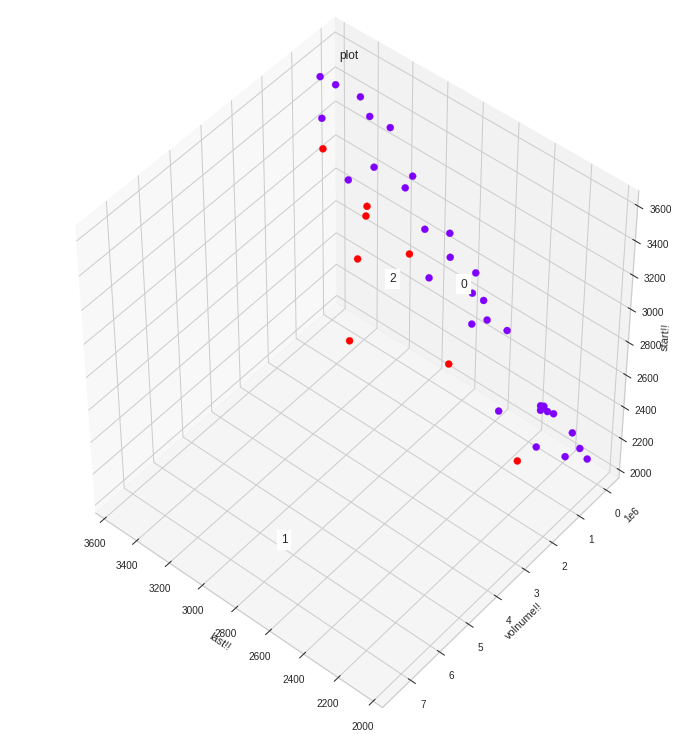

In [169]:
#군집 시각화 (3차원)
#점에 대한 값을 표시

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=130)

for name, label in [('0', 0),
                    ('1', 1),
                    ('2', 2)]:
    ax.text3D(final_df.loc[final_df[0] == label, 1].mean(),
              final_df.loc[final_df[0] == label, 2].mean(),
              final_df.loc[final_df[0] == label, 3].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=1, edgecolor='w', facecolor='w'))

ax.scatter(final_df[1], final_df[2], final_df[3], c= final_df[0], alpha=1, s = 50,cmap='rainbow')
ax.set_title('plot')
ax.set_xlabel('last!!')
ax.set_ylabel('volnume!!')
ax.set_zlabel('start!!')
plt.show()

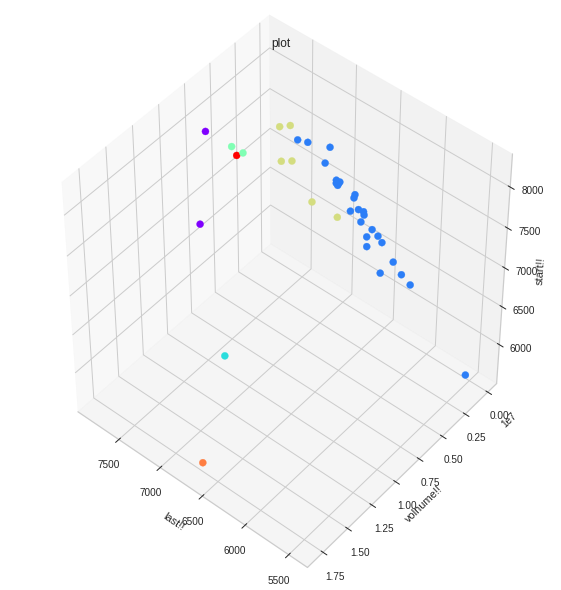

In [123]:
kmeans(t_5)

In [117]:
pd.DataFrame(np.array(y))

,0
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
39195,1.0
39196,1.0
39197,1.0
39198,1.0


전체를 정규화를 해서 모델링과 그래프화

In [21]:
# 변수 지정
data = pd.DataFrame()


In [22]:
data

""


In [23]:
# 변수 지정
data = pd.DataFrame()

for i in range(int(len(temp)/40)):
  if i == 0:
    f = i
  else:
    f = i + (39*i)
  n = f + 40
  data1 = temp.iloc[f:n,:]
  data1 = data1.loc[:,['현재가','거래량','시가']]

  # 정규화
  from sklearn.preprocessing import MinMaxScaler
  transformer = MinMaxScaler()
  transformer.fit(data1)
  data1 = transformer.transform(data1)
  data1 = pd.DataFrame(data1, columns = ['현재가', '거래량', '시가'])

  data = pd.concat([data, data1], axis = 0).reset_index(drop = True)


In [24]:
data

,현재가,거래량,시가
0,0.399329,0.192124,0.300330
1,0.298658,0.036665,0.382838
2,0.416107,0.060977,0.353135
3,0.382550,0.028464,0.366337
4,0.385906,0.044700,0.455446
...,...,...,...
39195,0.242038,0.446683,0.145570
39196,0.089172,0.053113,0.000000
39197,0.000000,0.000000,0.006329
39198,0.031847,0.078927,0.012658


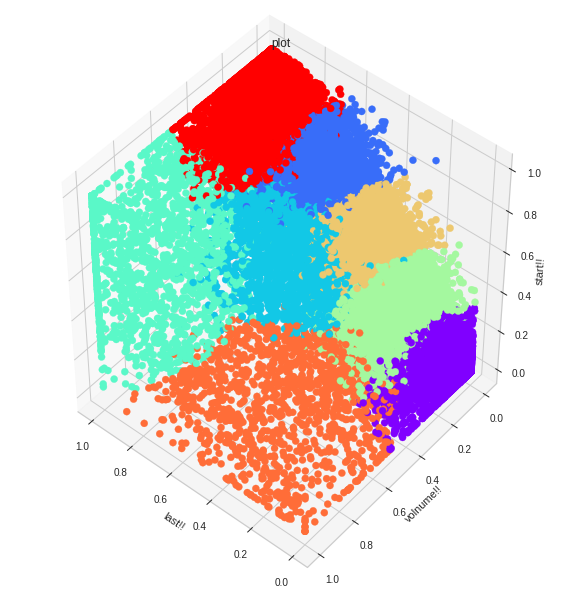

In [183]:
kmeans(data)

In [185]:
name.loc[name[0] == 1, 1]

9        0.516779
10       0.593960
11       0.647651
15       0.795302
16       0.771812
           ...   
39163    0.713376
39164    0.668790
39165    0.700637
39168    0.751592
39174    0.732484
Name: 1, Length: 6578, dtype: float64

In [184]:
name = pd.DataFrame(name)
name

,0,1,2,3
0,4.0,0.399329,0.192124,0.300330
1,4.0,0.298658,0.036665,0.382838
2,5.0,0.416107,0.060977,0.353135
3,5.0,0.382550,0.028464,0.366337
4,5.0,0.385906,0.044700,0.455446
...,...,...,...,...
39195,6.0,0.242038,0.446683,0.145570
39196,0.0,0.089172,0.053113,0.000000
39197,0.0,0.000000,0.000000,0.006329
39198,0.0,0.031847,0.078927,0.012658


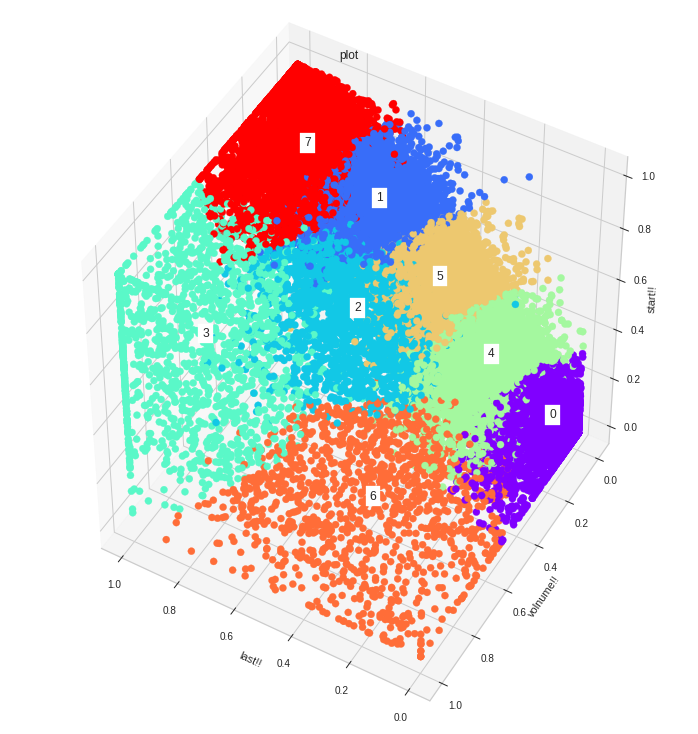

In [190]:
#군집 시각화 (3차원)
#점에 대한 값을 표시

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=120)

for nam, label in [('0', 0),
                    ('1', 1),
                    ('2', 2),
                    ('3', 3),
                    ('4', 4),
                    ('5', 5),
                    ('6', 6),
                    ('7', 7)]:
    ax.text3D(name.loc[name[0] == label, 1].mean(),
              name.loc[name[0] == label, 2].mean(),
              name.loc[name[0] == label, 3].mean(), nam,
              horizontalalignment='center',
              bbox=dict(alpha=1, edgecolor='w', facecolor='w'))

ax.scatter(name[1], name[2], name[3], c= name[0], alpha=1, s = 50,cmap='rainbow')
ax.set_title('plot')
ax.set_xlabel('last!!')
ax.set_ylabel('volnume!!')
ax.set_zlabel('start!!')
plt.show()

K를 8개로 하여, 3번이 최고의 점이구나!!!

In [191]:
# 뽑아내기
name.loc[name.loc[:,0] == 3,:]

,0,1,2,3
60,3.0,1.000000,0.676512,0.788419
61,3.0,0.824885,0.931564,0.496659
145,3.0,1.000000,1.000000,0.734940
196,3.0,0.902954,0.534387,0.584314
295,3.0,0.869048,1.000000,0.641026
...,...,...,...,...
39079,3.0,0.735294,0.692308,0.485714
39132,3.0,0.841727,1.000000,0.315789
39173,3.0,0.929936,1.000000,0.683544
39176,3.0,0.834395,0.650588,0.759494


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7289e1b978>,
                 k=None, metric=None, model=None, timings=True)

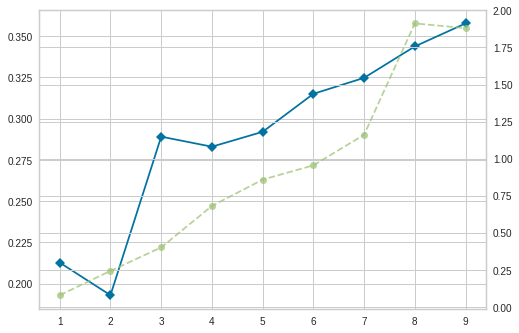

In [26]:
# 파란선은 그룹의 변동성을 녹선은 군집학습의 걸린 시간을
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data)

In [61]:
name

,0,1,2,3
0,5.0,0.399329,0.192124,0.300330
1,5.0,0.298658,0.036665,0.382838
2,9.0,0.416107,0.060977,0.353135
3,5.0,0.382550,0.028464,0.366337
4,9.0,0.385906,0.044700,0.455446
...,...,...,...,...
39195,4.0,0.242038,0.446683,0.145570
39196,0.0,0.089172,0.053113,0.000000
39197,0.0,0.000000,0.000000,0.006329
39198,0.0,0.031847,0.078927,0.012658


In [27]:
name[0].value_counts()

1.0    12793
2.0    12664
0.0    10917
3.0     2826
Name: 0, dtype: int64

> 최적의 K-Means 개수 찾기

> 데이터 분리하기

> SVM 모델을 적용, 그래프화 하기

> 딥러닝 파이토치로 적용

In [198]:
x = name.iloc[:,1:]
y = name.iloc[:,0]

In [199]:
y

0        4.0
1        4.0
2        5.0
3        5.0
4        5.0
        ... 
39195    6.0
39196    0.0
39197    0.0
39198    0.0
39199    0.0
Name: 0, Length: 39200, dtype: float64

In [200]:
# 전체 데이터train, test 데이터 구분 (함수화 - split로 이름지음)
from sklearn import model_selection as ms

def split(X_data, Y_data):
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = ms.train_test_split(X_data, Y_data, 
                                                           test_size = 0.2, random_state = 100, stratify = y)
    return

In [201]:
split(x,y)

In [202]:
y_test

34737    1.0
12909    0.0
3963     1.0
19048    3.0
23273    4.0
        ... 
28826    5.0
24094    7.0
4200     4.0
5495     0.0
33439    0.0
Name: 0, Length: 7840, dtype: float64

In [203]:
#시간을 계산하는 함수
import time, datetime
def clock(start):
    sec = time.time() - start #현재시간 - 시스템초기시간
    times = str(datetime.timedelta(seconds = sec)).split(".") # 시간:분:초로 변환
    times = times[0]
    return times

In [207]:
#title 기본 제목 텍스트
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def SVMMD(name):
  # 데이터 구분
  # split(target)


  # rbf
  start = time.time()
  print("rbf")
  svm_rbf = svm.SVC(kernel = 'rbf',random_state=100) #C=1, gamma=1
  svm_rbf.fit(X_train,y_train)
  rbf_pred=svm_rbf.predict(X_test)

  print('accuracy',mt.accuracy_score(y_test,rbf_pred) )
  print(confusion_matrix(y_test, rbf_pred))
  print(classification_report(y_test, rbf_pred))
  print("rbf 모델링 시간",clock(start))
  print("="*60, "\n")
  globals()['svm_rbf_{}'.format(name)] = svm_rbf

  # linear
  start = time.time()
  print("linear")
  svm_l = svm.SVC(kernel = 'linear',random_state=100) #C=1, gamma=1
  svm_l.fit(X_train,y_train)
  l_pred=svm_l.predict(X_test)

  print('accuracy',mt.accuracy_score(y_test,l_pred) )  
  print(confusion_matrix(y_test, l_pred))
  print(classification_report(y_test, l_pred))
  print("linear 모델링 시간",clock(start))
  print("="*60, "\n")
  globals()['svm_l_{}'.format(name)] = svm_l

  # poly
  start = time.time()
  print("poly")
  svm_poly = svm.SVC(kernel = 'poly',random_state=100) #C=1, gamma=1
  svm_poly.fit(X_train,y_train)
  poly_pred = svm_poly.predict(X_test)

  print('accuracy',mt.accuracy_score(y_test,poly_pred) )  
  print(confusion_matrix(y_test, poly_pred))
  print(classification_report(y_test, poly_pred))
  print("poly",clock(start))
  print("="*60, "\n")
  globals()['svm_poly_{}'.format(name)] = svm_poly

  ### 알림이 ####
  print(name, "svm_rbf_, svm_l_, svm_poly_ 뒤에 붙여 사용하슈")

In [208]:
SVMMD('a')

rbf
accuracy 0.9936224489795918
[[1538    0    0    0    2    0    2    0]
 [   0 1311    0    0    0    5    0    0]
 [   0    4  484    0    2    6    0    3]
 [   0    0    1  301    0    0    1    2]
 [   9    0    0    0 1494    0    0    0]
 [   0    0    2    0    6 1377    0    0]
 [   0    0    0    1    0    0  252    0]
 [   0    3    1    0    0    0    0 1033]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1542
         1.0       0.99      1.00      1.00      1316
         2.0       0.99      0.97      0.98       499
         3.0       1.00      0.99      0.99       305
         4.0       0.99      0.99      0.99      1503
         5.0       0.99      0.99      0.99      1385
         6.0       0.99      1.00      0.99       253
         7.0       1.00      1.00      1.00      1037

    accuracy                           0.99      7840
   macro avg       0.99      0.99      0.99      7840
weighted avg       0.99    

In [209]:
svm_rbf_a

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=100, shrinking=True, tol=0.001,
    verbose=False)

In [111]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

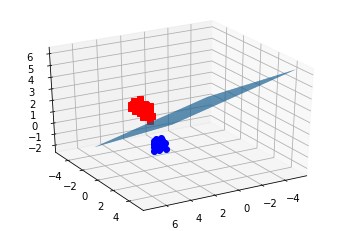

In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first three features.
Y = iris.target

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

In [ ]:
whole = temp.loc[:,['현재가','거래량','시가']]
whole

,현재가,거래량,시가
0,2650,1472052,2515
1,2500,328018,2640
2,2675,506930,2595
3,2625,267663,2615
4,2630,387148,2750
...,...,...,...
39195,32950,2108776,32400
39196,31750,739098,31250
39197,31050,554258,31300
39198,31300,828936,31350


In [ ]:
whole.columns

Index(['현재가', '거래량', '시가'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 정규화
transformer = MinMaxScaler()
transformer.fit(whole)
whole = transformer.transform(whole)
whole = pd.DataFrame(whole, columns = ['현재가', '거래량', '시가'])

In [ ]:
whole

,현재가,거래량,시가
0,0.001509,0.002988,0.001431
1,0.001418,0.000666,0.001507
2,0.001524,0.001029,0.001479
3,0.001494,0.000543,0.001491
4,0.001497,0.000786,0.001573
...,...,...,...
39195,0.019886,0.004280,0.019599
39196,0.019158,0.001500,0.018900
39197,0.018733,0.001125,0.018931
39198,0.018885,0.001682,0.018961


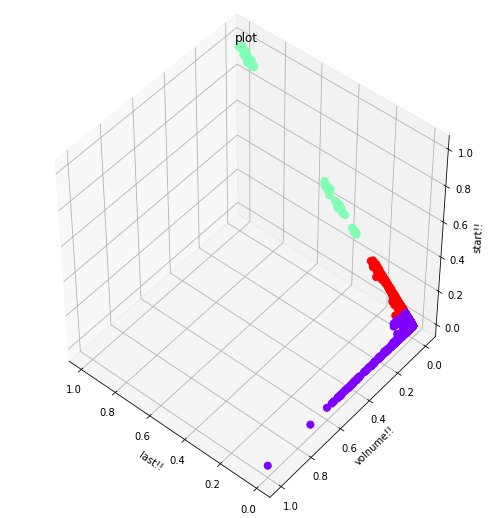

In [ ]:
kmeans(whole)

In [ ]:
from sklearn.cluster import KMeans

#클러스터의 개수 지정(n개)
num_clusters = 2

#알맞은 매트릭스 Z 삽입
km = KMeans(n_clusters=num_clusters)
km.fit(a)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
from scipy.spatial.distance import cdist
distortions = []

K = range(0,40)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(a)
    kmeanModel.fit(a)
    distortions.append(sum(np.min(cdist(a, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / a.shape[0])
  
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

OverflowError: ignored


https://dacon.io/competitions/official/235663/codeshare/2159?page=1&dtype=recent&ptype=pub


In [ ]:
Z = clus_data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Z)
    kmeanModel.fit(Z)
    distortions.append(sum(np.min(cdist(Z, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Z.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
model = KMeans(n_clusters=4,algorithm='auto')
model.fit(clus_data)

predict = pd.DataFrame(model.predict(clus_data))
center = model.cluster_centers_
labels = model.labels_
predict.columns=['predict']

# 결과 합치기
final_df = pd.DataFrame(np.hstack((predict, clus_data)))
# 컬럼명 지정
cols = list(clus_data.columns.values)
cols.insert(0,'group')
final_df.columns = cols

# 그룹이름 변경
group_name = {0: 'gr01',
               1: 'gr02',
               2: 'gr03',
              3: 'gr04'}

final_df['group'] = final_df['group'].replace(group_name)
new_cus['group'] = final_df['group']

In [ ]:
# 2개의 차원으로 축소
transformed = PCA(n_components=2).fit_transform(clus_data)

pca_df = pd.DataFrame(data=transformed, columns=['제1주성분','제2주성분']) 
plt.figure(figsize=(20,10))
plt.scatter('제1주성분','제2주성분',data=pca_df,c=labels,cmap='rainbow')
plt.xlabel('제1주성분')
plt.ylabel('제2주성분')
plt.show

In [ ]:
#군집 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D
dim3 = PCA(n_components=3).fit_transform(clus_data)

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=130)
ax.scatter(dim3[:,0], dim3[:,1], dim3[:,2], c=labels, alpha=0.5, cmap='rainbow')
ax.set_title('3차원 산점도 그래프')
ax.set_xlabel('제1 주성분')
ax.set_ylabel('제2 주성분')
ax.set_zlabel('제3 주성분')
plt.show()

In [ ]:
pca = PCA(n_components=4)
pca.fit_transform(clus_data)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
# 3차원 주성분으로 65% 설명 가능

In [ ]:
# 그룹 별 개수 시각화
sns.countplot(new_cus['group'], palette="Set2")
new_cus['group'].value_counts()